ANÁLISE EXPLORATÓRIA: MIX DE PRODUTOS

IMPORTS:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea

DATA FRAME

In [2]:
df = pd.read_excel("../Proj2.xlsx")

Informações que desejamos conseguir:

        Quais subcategorias e categorias mais vendem?

        Quais dão mais lucro?

        Quais vendem mais em quantidade?

        Quais têm boa ou má margem de lucro?

        Poucos produtos são responsáveis por grande parte da receita? 

MIX DE PRODUTOS: 1- RECEITA E LUCRO POR CATEGORIA E SUBCATEGORIA:

In [3]:
tabela = df.groupby(["categoria", "subcategoria"]).agg({  #groupby(mostrado em aula) agrupa as categorias em subcategorias em uma tabela com essas duas colunas e agg= agregate 
    "vendas": "sum",
    "lucro": "sum",
}).reset_index() #gera uma nova tabela

tabela = tabela.sort_values(by= "vendas", ascending = False)
tabela.head(10)


,categoria,subcategoria,vendas,lucro
13,Tecnologia,Acessórios,362835.9110,87487.8835
9,Móveis,Cadeiras,322277.1790,25916.5835
16,Tecnologia,Telefones,300308.8400,41747.0538
0,Materiais de Escritório,Armazenamento,226834.6900,14246.0712
7,Materiais de Escritório,Pastas,206183.9680,31691.2063
11,Móveis,Mesas,171650.3305,-13194.1471
12,Móveis,Mobiliário,131102.1555,9091.4873
10,Móveis,Estantes,121464.6363,-2658.1400
6,Materiais de Escritório,Papel,113159.2480,37627.0488
15,Tecnologia,Máquinas,107238.9660,6860.7173


Produtos que mais venderam:
Acessórios (Tecnologia) foi o oq mais deu receita e também com um dos maiores lucros 

Cadeiras (Móveis) e Telefones (Tecnologia) também geraram receitas consideráveis, mas com lucros mais baixos proporcionalmente

Produtos que vendem bem, mas dão prejuízo:
Mesas teve R$ 170 mil em vendas, mas um lucro negativo (-13 mil) 

Fatores que podem ter gerado isso:

Descontos altos demais(PROVAVEL, pelo q eu bati o olho na tabela)

Custo alto


CÁLCULO DA MARGEM

In [4]:
tabela["Margem"] = tabela["lucro"] / tabela["vendas"]
print("Subcategorias com maior margem: ")
print(tabela.sort_values(by="Margem", ascending= False).head(10))
print("Subcategorias com menor margem")
print(tabela.sort_values(by="Margem", ascending = True).head(10))

Subcategorias com maior margem: 
                  categoria      subcategoria      vendas       lucro  \
4   Materiais de Escritório         Etiquetas   16148.654   7139.1828   
3   Materiais de Escritório         Envelopes   12990.528   5468.6975   
5   Materiais de Escritório         Fixadores    3190.948   1090.2541   
6   Materiais de Escritório             Papel  113159.248  37627.0488   
13               Tecnologia        Acessórios  362835.911  87487.8835   
1   Materiais de Escritório              Arte   26497.641   6270.0219   
8   Materiais de Escritório       Suprimentos   21300.578   4376.2438   
2   Materiais de Escritório  Eletrodomésticos  105201.289  18012.7359   
7   Materiais de Escritório            Pastas  206183.968  31691.2063   
16               Tecnologia         Telefones  300308.840  41747.0538   

      Margem  
4   0.442092  
3   0.420976  
5   0.341671  
6   0.332514  
13  0.241122  
1   0.236626  
8   0.205452  
2   0.171222  
7   0.153704  
16  0.139014 

Comportamento de venda por volume

subcategoria
Copiadoras          3.310345
Suprimentos         3.378531
Telefones           3.652796
Armazenamento       3.679472
Mobiliário          3.739960
Envelopes           3.751938
Eletrodomésticos    3.752083
Papel               3.760417
Arte                3.773881
Cadeiras            3.811111
Name: quantidade, dtype: float64


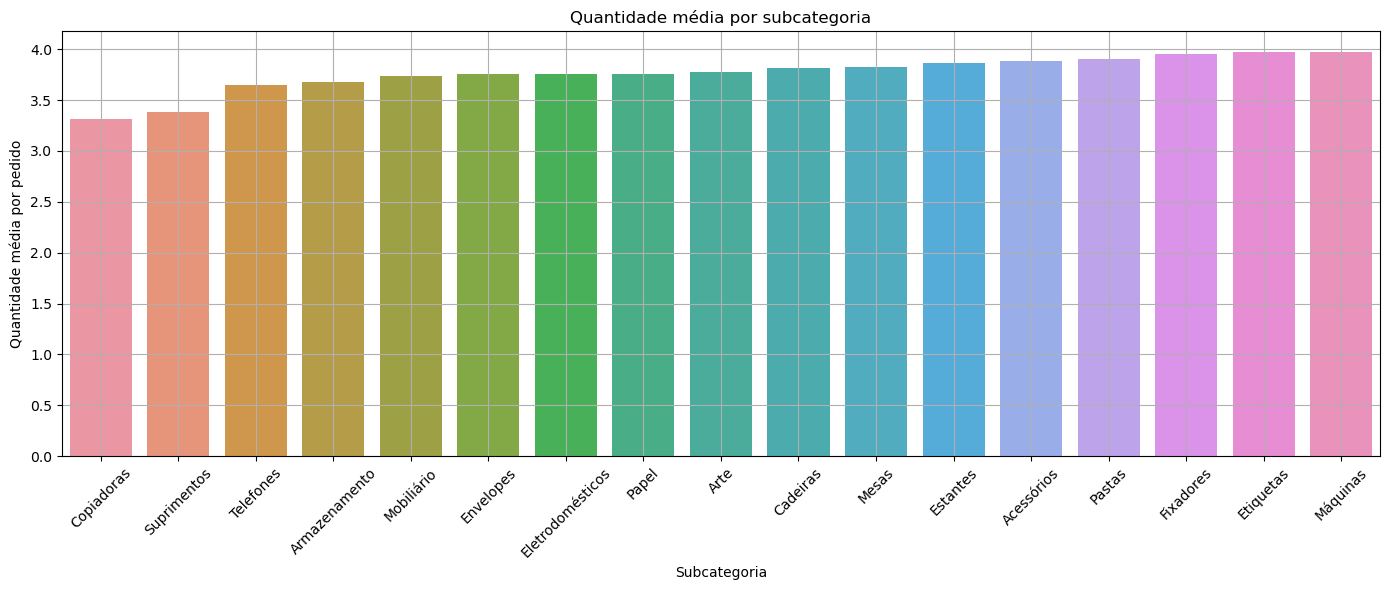

In [5]:
quantidade_media = df.groupby("subcategoria")["quantidade"].mean().sort_values(ascending = True)
print(quantidade_media.head(10))

plt.figure(figsize=(14,6))
sea.barplot(x=quantidade_media.index, y=quantidade_media.values)
plt.xticks(rotation = 45)
plt.title("Quantidade média por subcategoria")
plt.xlabel("Subcategoria")
plt.ylabel("Quantidade média por pedido")
plt.tight_layout()
plt.grid(True)
plt.show()


Acessórios, Cadeiras e Telefones são líderes em receita.

Mesas e Estantes, apesar de venderem bem, deram prejuízo.

Volume de vendas não garante lucro , é bom olhar margem.

In [6]:
tabela["Margem Média"] = tabela["lucro"] / tabela["vendas"]
menores = tabela.sort_values(by = "Margem Média", ascending = True).head(10)
melhores = tabela.sort_values(by = "Margem Média", ascending = False).head(10)

print("As subcategorias com menor margem")
print(menores)
print("As subcategorias com maior margem")
print(melhores)

As subcategorias com menor margem
                  categoria      subcategoria       vendas       lucro  \
11                   Móveis             Mesas  171650.3305 -13194.1471   
10                   Móveis          Estantes  121464.6363  -2658.1400   
0   Materiais de Escritório     Armazenamento  226834.6900  14246.0712   
15               Tecnologia          Máquinas  107238.9660   6860.7173   
12                   Móveis        Mobiliário  131102.1555   9091.4873   
9                    Móveis          Cadeiras  322277.1790  25916.5835   
14               Tecnologia        Copiadoras   48815.2980   5224.1211   
16               Tecnologia         Telefones  300308.8400  41747.0538   
7   Materiais de Escritório            Pastas  206183.9680  31691.2063   
2   Materiais de Escritório  Eletrodomésticos  105201.2890  18012.7359   

      Margem  Margem Média  
11 -0.076866     -0.076866  
10 -0.021884     -0.021884  
0   0.062804      0.062804  
15  0.063976      0.063976  
12  0.

tiquetas, Envelopes, Papel → Alta margem com vendas menores (top).

Mesas, Estantes, Mobiliário → Margens muito baixas, inclsuive negativas, mesmo com volume alto.

A empresa pode estar vendendo demais e lucrando de menos com produtos de alto giro e margem baixa.

Curva ABC

In [7]:
tabelacurva = tabela[["subcategoria", "vendas"]].copy()
tabelacurva = tabelacurva.sort_values(by = "vendas", ascending = False)
tabelacurva["%"] = tabelacurva["vendas"]/ tabelacurva["vendas"].sum()
tabelacurva["% acumulada"] = tabelacurva["%"].cumsum()
tabelacurva.head(15)

,subcategoria,vendas,%,% acumulada
13,Acessórios,362835.9110,0.157947,0.157947
9,Cadeiras,322277.1790,0.140291,0.298238
16,Telefones,300308.8400,0.130728,0.428966
0,Armazenamento,226834.6900,0.098744,0.527710
7,Pastas,206183.9680,0.089754,0.617465
11,Mesas,171650.3305,0.074722,0.692186
12,Mobiliário,131102.1555,0.057070,0.749257
10,Estantes,121464.6363,0.052875,0.802132
6,Papel,113159.2480,0.049260,0.851391
15,Máquinas,107238.9660,0.046682,0.898074


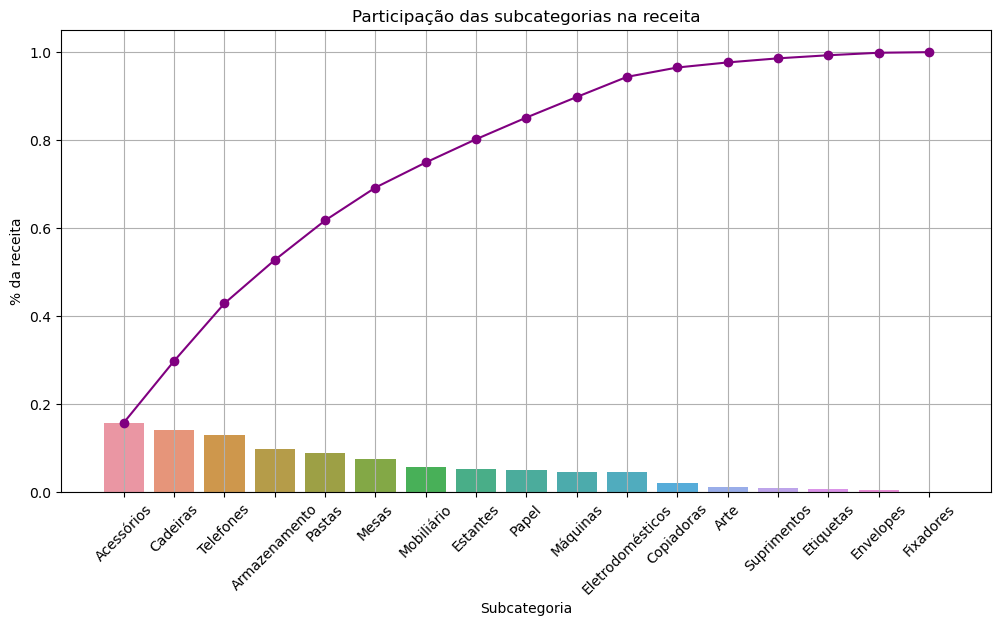

In [8]:
plt.figure(figsize = (12,6))
sea.barplot(x = "subcategoria", y = "%", data=tabelacurva)
plt.plot(tabelacurva["% acumulada"].values, color = "purple", marker = "o")
plt.xticks(rotation=45)
plt.title("Participação das subcategorias na receita")
plt.xlabel("Subcategoria")
plt.ylabel("% da receita")
plt.tight_layout
plt.grid(True)
plt.show()
#.values converte a coluna do DataFrame em um array do NumPy, garante melhor entendimento do matplotlib(que foi criado antes dos pandas)

As 6 primeiras subcategorias já somam  aproxidamente 70% da receita.

Confirma o princípio de Pareto: poucos produtos geram a maior parte da receita.

Estratégia pode ser  manter estoques e campanhas de marketing mais focadas nessas subcategorias.

Desconto relação com o lucro

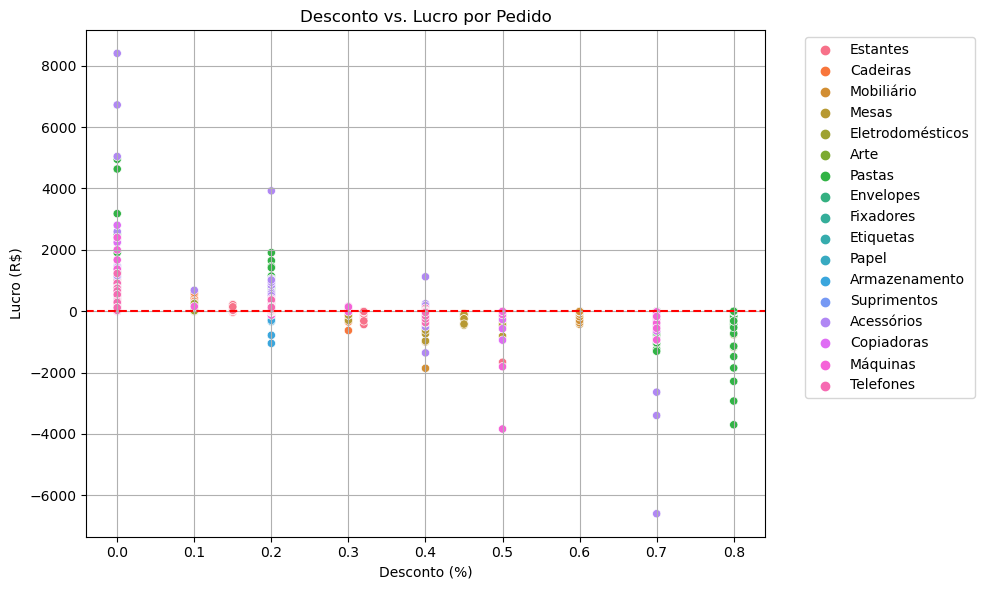

In [9]:
plt.figure(figsize=(10,6))
sea.scatterplot(data=df, x='desconto', y='lucro', hue='subcategoria')
plt.title('Desconto vs. Lucro por Pedido')
plt.xlabel('Desconto (%)')
plt.ylabel('Lucro (R$)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axhline(0, color='red', linestyle='--') 
plt.tight_layout()
plt.grid(True)
plt.show()

  A partir de mais ou menos 20% de desconto, os lucros caem muito, ficando até negativos.

Descontos muito agressivos diminuem muito a margem.

Dessa forma, mostra que o desconto maior que 45% não é nada lucrativo, na verdade causando consideráveis prejúizos. Além disso, analisando o gráfico abaixo, é possível perceber que faixas de desconto diferentes possuem vendas semelhantes, ou seja, produtos que se encontram na faixa de 5-15% de desconto vendem tanto quanto produtos com mais de 50% de desconto. Portanto, descontos mais agressivos não aumentam as vendas e só aumentam o prejuízo. Considerando isso, pode ser interessante para a empresa trabalhar com faixas de desconto menores, onde existe o lucro e a venda se mantém a mesma, ou se quiserem continuarem proporcionando descontos maiores, pode ser feito um maior marketing desses produtos e uma alteração nos preços, de forma que haja lucro.


Volume médio e desconto

In [10]:
df['faixa_desconto'] = pd.cut(df['desconto'], bins=[0, 0.05, 0.15, 0.3, 0.5, 1],labels=['0-5%', '5-15%', '15-30%', '30-50%', '50%+'])
quantidade_por_faixa = df.groupby('faixa_desconto')['quantidade'].mean()
print(quantidade_por_faixa)

faixa_desconto
0-5%           NaN
5-15%     3.910959
15-30%    3.735582
30-50%    3.796774
50%+      3.912383
Name: quantidade, dtype: float64


C:\Users\joaoh\AppData\Local\Temp\ipykernel_14480\672773973.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantidade_por_faixa = df.groupby('faixa_desconto')['quantidade'].mean()


AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

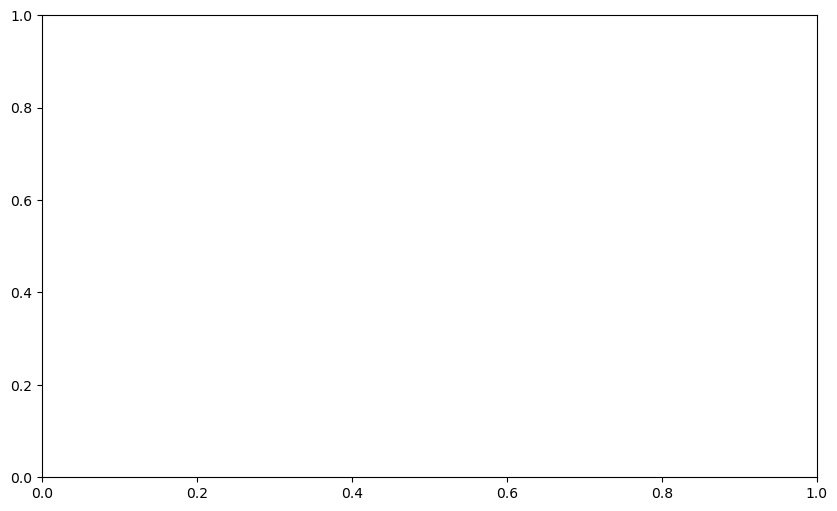

In [11]:
plt.figure(figsize=(10,6))
sea.barplot(x=quantidade_por_faixa.index, y=quantidade_por_faixa.values, hue = quantidade_por_faixa.index, palette="viridis", legend= False)
plt.title('Elasticidade: Quantidade média por faixa de desconto')
plt.xlabel('Faixa de desconto (%)')
plt.ylabel('Quantidade média vendida')
plt.tight_layout()
plt.grid(True)
plt.show()


Não há aumento expressivo de volume nas faixas mais altas, o que indica baixa elasticidade, dessa forma dar mais desconto não traz tanto retorno em volume, e só prejudica o lucro. (Análise completa acima)

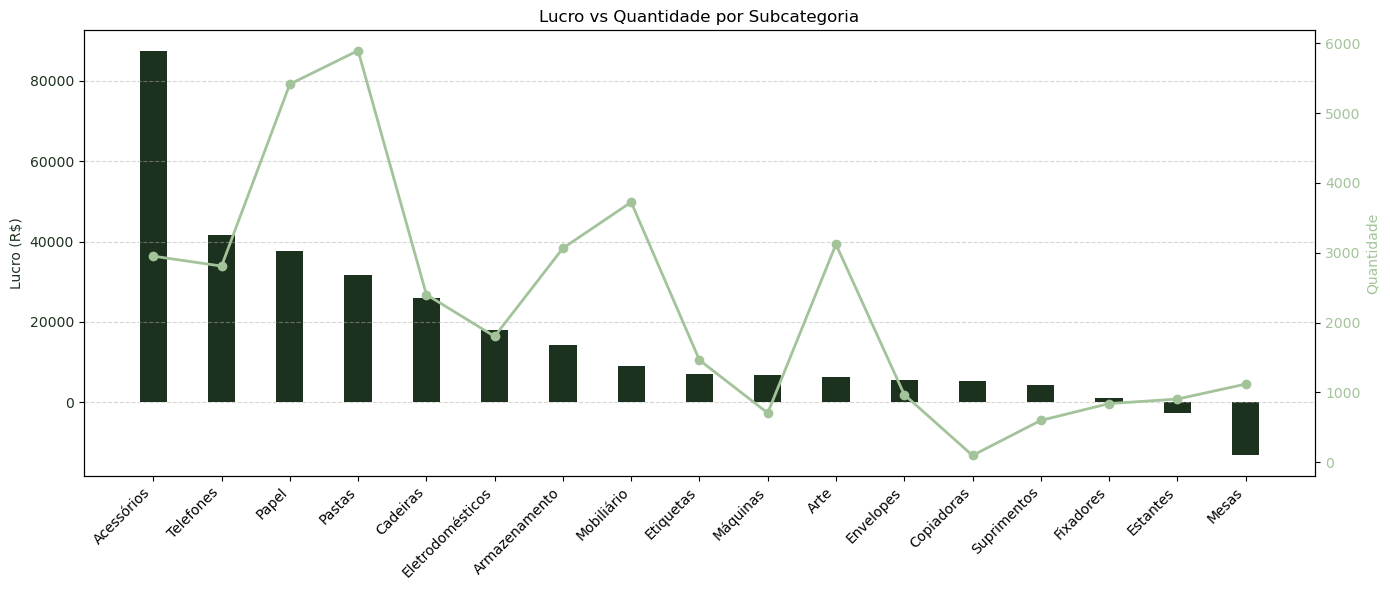

1118

In [ ]:

resumo = df.groupby('subcategoria').agg({
    'quantidade': 'sum',
    'lucro': 'sum'
}).sort_values('lucro', ascending=False)

verde_escuro = '#1D311F'  # lucro
verde_claro = '#A3C39A'   # quantidade
fig, ax1 = plt.subplots(figsize=(14, 6))

subcategorias = resumo.index
x = range(len(subcategorias))

ax1.bar(x, resumo['lucro'], width=0.4, color=verde_escuro, label='Lucro Total')
ax1.set_ylabel('Lucro (R$)', color=verde_escuro)
ax1.tick_params(axis='y', labelcolor=verde_escuro)

ax2 = ax1.twinx()
ax2.plot(x, resumo['quantidade'], color=verde_claro, marker='o', label='Quantidade Vendida', linewidth=2)
ax2.set_ylabel('Quantidade', color=verde_claro)
ax2.tick_params(axis='y', labelcolor=verde_claro)

ax1.set_xticks(x)
ax1.set_xticklabels(subcategorias, rotation=45, ha='right')
ax1.set_title('Lucro vs Quantidade por Subcategoria')

ax1.grid(axis='y', linestyle='--', alpha=0.5)
fig.tight_layout()
plt.show()